In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data_science_job.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [6]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [8]:
#Apply cca where only when missing data is less than 5%

In [14]:
df.isnull().mean()

enrollee_id               0.000000
city                      0.000000
city_development_index    0.025003
gender                    0.235306
relevent_experience       0.000000
enrolled_university       0.020148
education_level           0.024011
major_discipline          0.146832
experience                0.003393
company_size              0.309949
company_type              0.320493
training_hours            0.039983
target                    0.000000
dtype: float64

In [9]:
df.shape

(19158, 13)

In [13]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [15]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
12636,0.920,no_enrollment,Graduate,7.0,19.0
10862,0.550,no_enrollment,Graduate,6.0,60.0
4121,0.897,no_enrollment,Masters,20.0,46.0
7592,0.910,no_enrollment,Masters,16.0,102.0
4852,0.897,no_enrollment,Masters,11.0,308.0


In [19]:
len(df[cols].dropna()) / len(df)

0.8968577095730244

In [20]:
new_df = df[cols].dropna()
df.shape, new_df.shape

((19158, 13), (17182, 5))

<Axes: xlabel='city_development_index', ylabel='Count'>

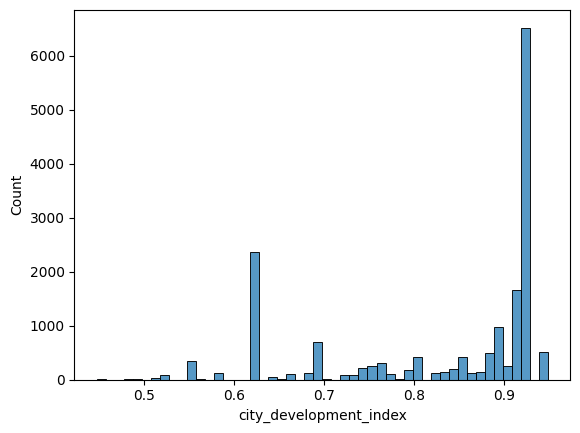

In [29]:
sns.histplot(data= new_df['city_development_index'], bins=50)

<Axes: xlabel='experience', ylabel='Count'>

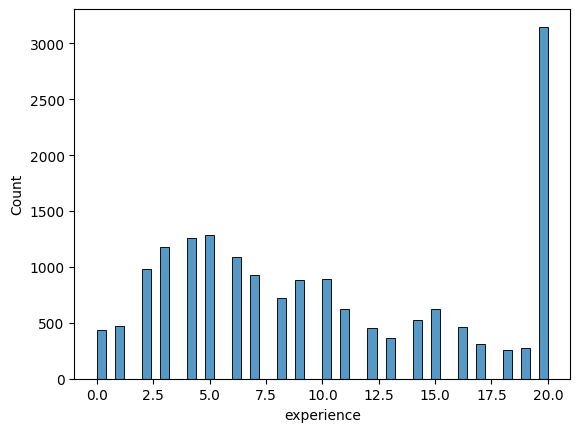

In [30]:
sns.histplot(data= new_df['experience'], bins=50)

<Axes: xlabel='training_hours', ylabel='Count'>

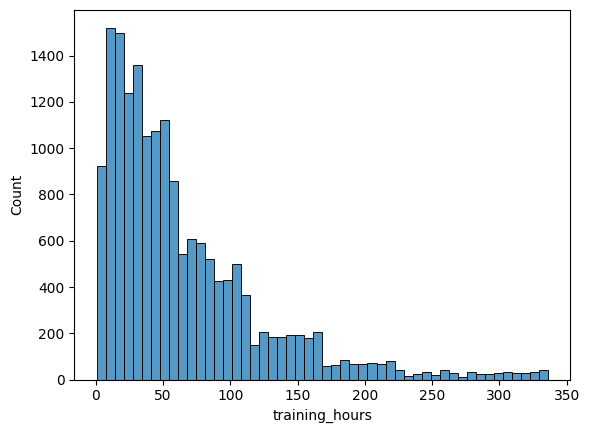

In [31]:
sns.histplot(data= new_df['training_hours'], bins=50)

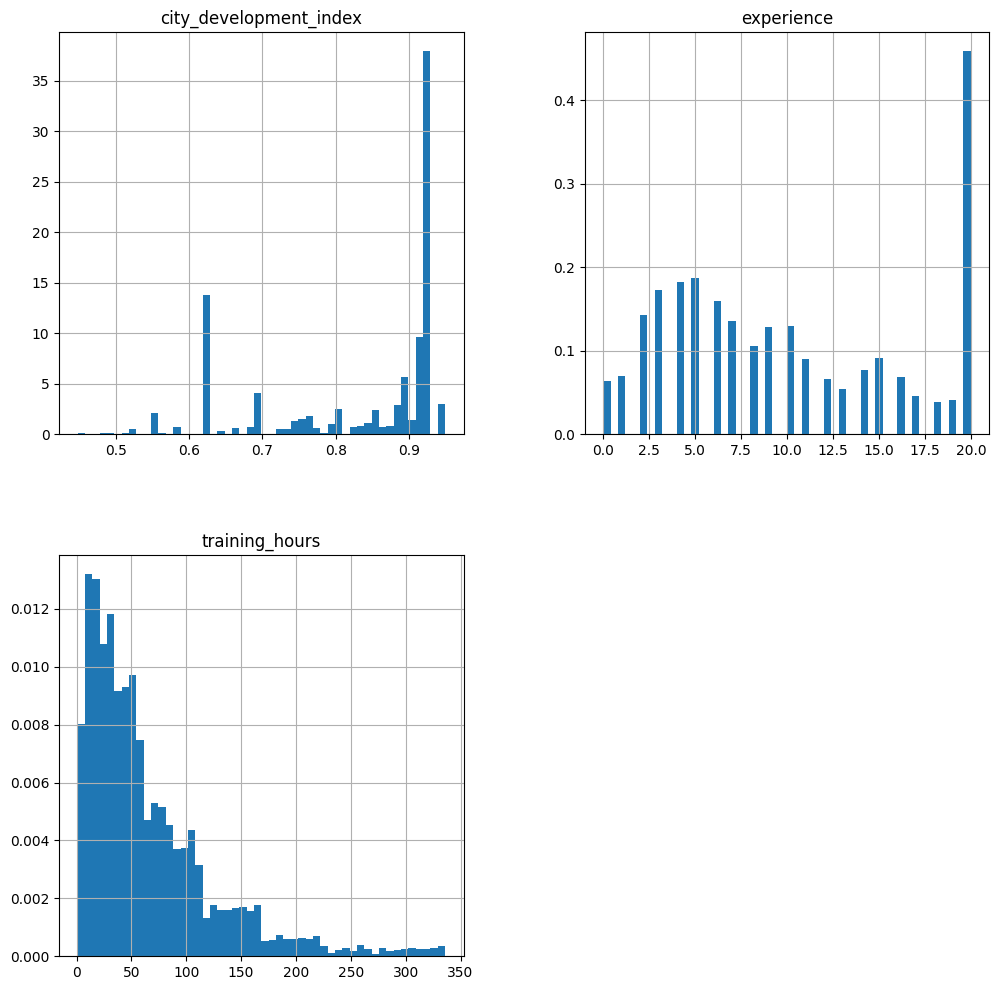

In [21]:
new_df.hist(bins = 50, density = True, figsize=(12,12))
plt.show()

In [32]:
#If you have numerical data, and you have applied cca, then plot histogram. before applying cca and after applying cca, if distribution is comparable then it is correct and no mistakes.

<Axes: >

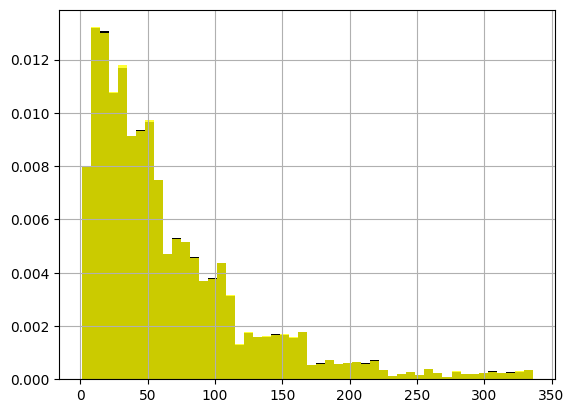

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111)

#original data
df['training_hours'].hist(bins=50, ax=ax, density = True, color = 'black')

#data after cca, the arugment alpha makes the color transparent, so we can see the overlay of the 2 distributions
new_df['training_hours'].hist(bins=50, ax=ax, color= 'yellow', density = True, alpha = 0.8)

<Axes: ylabel='Density'>

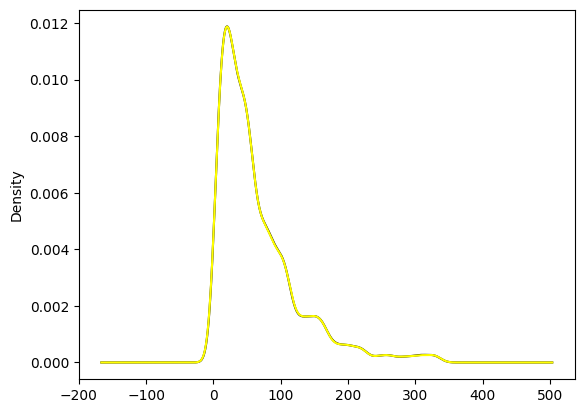

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111)

#original data
df['training_hours'].plot.density(color = 'black')

#data after cca
new_df['training_hours'].plot.density(color='yellow')

<Axes: >

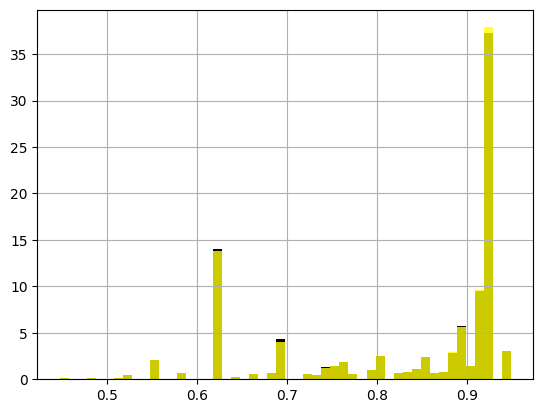

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111)

#original data
df['city_development_index'].hist(bins=50, ax=ax, density = True, color='black')

#data after cca, the argument alpha makes the color transparent, so we can see the overlay of 2 distributions.
new_df['city_development_index'].hist(bins=50, ax=ax, density = True, color= 'yellow', alpha = 0.8)

<Axes: ylabel='Density'>

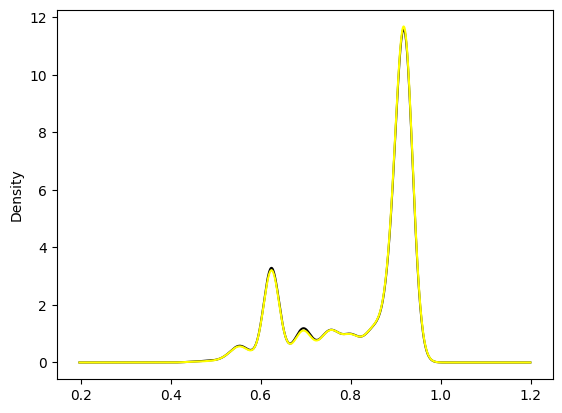

In [41]:
#fig = plt.figure()
#ax = fig.add_subplot(111)

#original data
df['city_development_index'].plot.density(color = 'black')

#new data
new_df['city_development_index'].plot.density(color='yellow')

<Axes: >

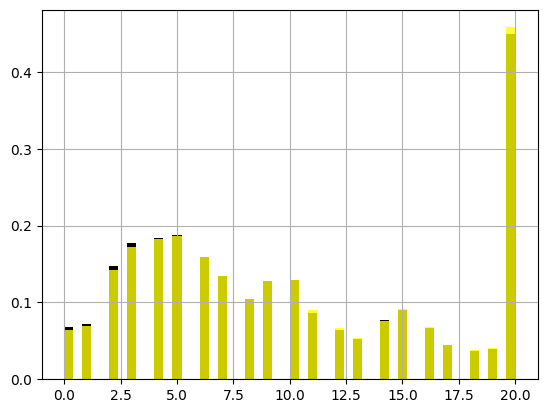

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111)

#original data
df['experience'].hist(bins=50, ax=ax, density = True, color='black')

#data after cca, the argument alpha makes the color transparent, so we can see the overlay of the 2 distributions.
new_df['experience'].hist(bins=50, ax=ax, density = True, color='yellow', alpha= 0.8)

<Axes: ylabel='Density'>

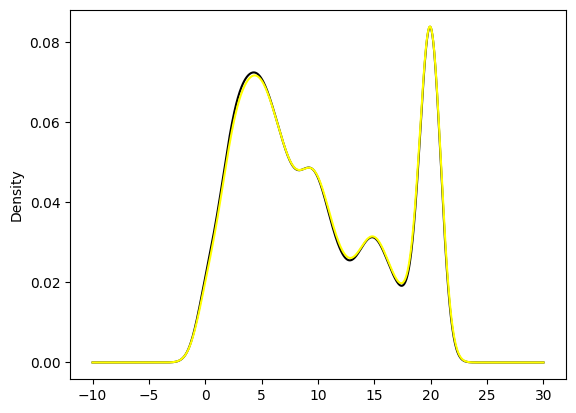

In [43]:
#original_data
df['experience'].plot.density(color='black')

#after cca
new_df['experience'].plot.density(color='yellow')

In [54]:
#There are two categorical columns, enrolled_university and 
temp = pd.concat([
    #percentage of observations per category, original data
    df['enrolled_university'].value_counts() / len(df),

    #percentage of observations per category, cca data
    new_df['enrolled_university'].value_counts() / len(new_df)

],
axis = 1)

#add column names
temp.columns = ['original', 'cca']

In [55]:
temp

,original,cca
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [ ]:
df['enrolled_university'].value_counts() 

enrolled_university
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: count, dtype: int64

In [48]:
len(df)

19158

In [50]:
df.shape

(19158, 13)

In [51]:
df['enrolled_university'].value_counts() / len(df)

enrolled_university
no_enrollment       0.721213
Full time course    0.196106
Part time course    0.062533
Name: count, dtype: float64

In [57]:
temp = pd.concat([
    #percentage of observations per category, original data
    df['education_level'].value_counts() / len(df), 

    #percentage of observations per category, cca data
    new_df['education_level'].value_counts() / len(new_df)
], axis = 1)

#add column names
temp.columns = ['orignal', 'cca']

In [58]:
temp

,orignal,cca
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587
